In [2]:
import sys
from pathlib import Path

math_finance_path = Path("../math-finance")
sys.path.append(str(math_finance_path))

In [3]:
from optimisation import newton_raphson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Check Newton-Raphson on a simple function 

f = lambda x: x**2 - 4
f_prime = lambda x: 2*x
tol = 1e-10
max_iter = 100
x0 = 100 # Very bad initial guess

newton_raphson(f,f_prime,x0,tol,max_iter,return_list=False)


2.0

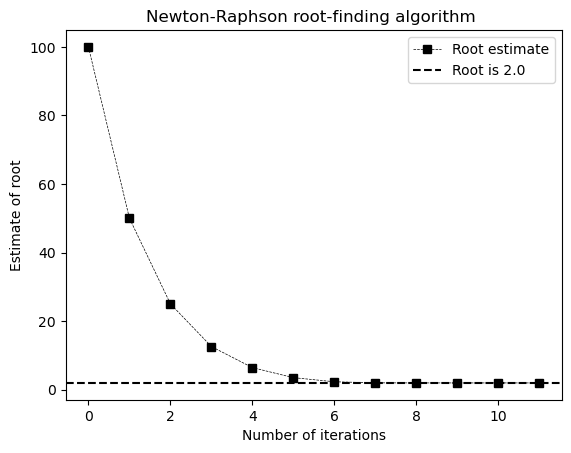

In [5]:
plt.plot(newton_raphson(f,f_prime,x0,tol,max_iter,return_list=True), label="Root estimate", marker="s", 
         linestyle="--", color="black", linewidth=0.5)
plt.title("Newton-Raphson root-finding algorithm ")
plt.xlabel("Number of iterations")
plt.ylabel("Estimate of root")
plt.axhline(2, linestyle="--", color="black", label="Root is 2.0")
plt.legend()
plt.show();

In [6]:
# Implied volatility example

from model import implied_volatility

S0, K, T, r =  30, 28, 0.2, 0.025
market_price = 3.97

implied_volatility_estimation = implied_volatility(S0,r,K,T,market_price)
print(f"Implied volatility is: {round(implied_volatility_estimation*100, 2)}%")


Implied volatility is: 7402478.59%


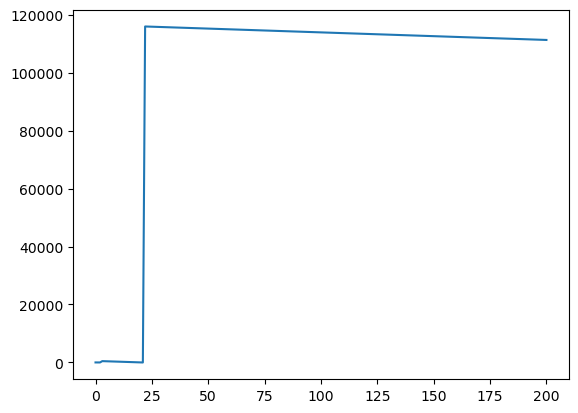

In [ ]:
# Solution diverges!

plt.plot(implied_volatility(S0,r,K,T,market_price, return_list=True))
plt.show();

In [26]:
from model import BlackScholes

type = "call"
S0, K, T, r =  30, 28, 0.2, 0.025
market_price = 3.87

black_scholes_price = lambda vol : BlackScholes(S0, K, T, r, vol, type=type).price - market_price
black_scholes_delta = lambda vol : BlackScholes(S0, K, T, r, vol, type=type).delta


newton_raphson(black_scholes_price, black_scholes_delta, 0.30, 
               tol=1e-5, max_iter=10, return_list=False)



265.7282970836775

In [37]:
x0 = 2
x0 - (black_scholes_price(x0) - market_price)/black_scholes_delta(x0)




-2.773651739681191